In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [24]:
data= pd.read_csv('eco.csv')

In [4]:
data[:60]

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,8.000000e+07,313107,228,44,11,380000,405,534,134
1,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,3.607000e+08,885681,809,50,10,359500,332,196,13
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,1.055000e+07,106386,128,6,6,400000,479,12,0
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,1.500000e+08,350000,254,14,8,403000,558,91,24
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,2.222000e+08,457374,402,12,4,425500,809,63,0
5,2013,6,2824862,3402,0.911,244.45,329151,0.070,0.645,482,1.435000e+08,632666,405,14,13,445000,864,352,47
6,2013,7,2978718,3660,0.886,221.20,329650,0.068,0.645,1376,6.409244e+08,1482428,1029,19,11,429000,909,462,44
7,2013,8,3020074,3700,0.917,223.00,330525,0.063,0.643,134,5.789770e+07,283502,203,11,8,435000,989,20,3
8,2013,9,2504491,3181,0.881,255.50,326334,0.063,0.635,833,1.021000e+09,1380698,1112,19,6,438000,677,357,23
9,2013,10,2672640,3056,0.915,287.47,328683,0.058,0.637,542,3.493240e+08,1010491,2835,15,10,465000,619,42,185


In [7]:
intl_fights=data['logan_intl_flights'].tolist()
intl_=data['logan_intl_flights']
hotel_occup=data['hotel_occup_rate']
hotel_price=data['hotel_avg_daily_rate']
jobs=data['total_jobs']
unemp=data['unemp_rate']
labor=data['labor_force_part_rate']
unit=data['pipeline_unit']
cost=data['pipeline_total_dev_cost']
sqft=data['pipeline_sqft']
const_jobs=data['pipeline_const_jobs']

In [12]:
data

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,date
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,8.000000e+07,313107,228,44,11,380000,405,534,134,2013-01-01
1,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,3.607000e+08,885681,809,50,10,359500,332,196,13,2013-02-01
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,1.055000e+07,106386,128,6,6,400000,479,12,0,2013-03-01
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,1.500000e+08,350000,254,14,8,403000,558,91,24,2013-04-01
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,2.222000e+08,457374,402,12,4,425500,809,63,0,2013-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2019,8,4120937,5190,0.888,270.54,392536,0.027,0.676,176,8.821200e+08,1144908,931,0,0,0,0,0,0,2019-08-01
80,2019,9,3547546,4586,0.895,312.37,385445,0.028,0.665,286,9.103200e+07,416015,307,0,0,0,0,0,0,2019-09-01
81,2019,10,3771212,4388,0.907,313.17,390983,0.023,0.671,393,9.680000e+08,1261737,972,0,0,0,0,0,0,2019-10-01
82,2019,11,3264105,3959,0.803,238.82,391531,0.021,0.670,480,3.243000e+08,688168,539,0,0,0,0,0,0,2019-11-01


In [28]:
import copy
df=copy.copy(data)

In [135]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def stationary(data,a):

    result = adfuller(df['logan_passengers'])

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")


In [136]:
stationary(df,'hotel_avg_daily_rate')

ADF Statistic: -3.415047
p-value: 0.010457
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
The time series is stationary.


In [122]:

def compare_plt(data,a,b):
    plt.figure(figsize=(12, 6))
    df=data
    ax1 = plt.gca()
    amount_line,= ax1.plot(df['year_month'], df[a], color='blue', label=a)
    amount_scatter = ax1.scatter(df['year_month'], df[a], color='blue')
    ax1.set_ylabel(a)
    ax1.tick_params(axis='y', labelcolor='blue')

    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    ax2 = ax1.twinx()
    price_line, = ax2.plot(df['year_month'], df[b], color='green', label=b)
    price_scatter = ax2.scatter(df['year_month'], df[b], color='green')
    ax2.set_ylabel(b)
    ax2.tick_params(axis='y', labelcolor='green')


    plt.title(a+' and '+b)
    ax1.set_xlabel('Year-Month')

    ax1.legend(handles=[amount_line, amount_scatter], loc='upper left')
    ax2.legend(handles=[price_line, price_scatter], loc='upper right')

    plt.tight_layout()
    plt.savefig(a+b+'.png')
    plt.show()

D:\Anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


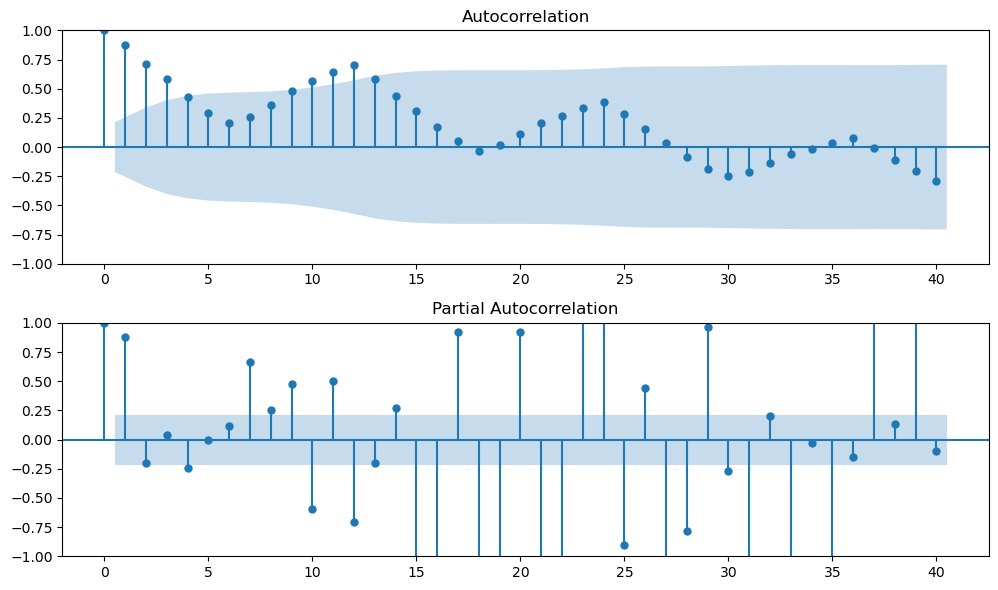

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(df['logan_intl_flights'], lags=40, ax=ax1)  # You can adjust the number of lags
plot_pacf(df['logan_intl_flights'], lags=40, ax=ax2)
plt.tight_layout()
plt.show()

In [138]:
import pandas as pd
import statsmodels.api as sm

adf_test = sm.tsa.adfuller(df['hotel_avg_daily_rate'], autolag='AIC')

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_test[1] > 0.05:
    print("The time series is likely non-stationary.")
else:
    print("The time series is likely stationary.")


ADF Statistic: -3.415047
p-value: 0.010457
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
The time series is likely stationary.


In [141]:

def compare(dataset,a,b):

    df=dataset
    plt.scatter(df[a], df[b])

    plt.title(a+' vs '+b)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.savefig(a+b+'cor')
    plt.show()
    correlation = df[a].corr(df[b])
    print("Correlation coefficient:", correlation)
    corr_test = stats.pearsonr(df[a], df[b])
    print("Correlation Coefficient:", corr_test[0])
    print("P-value:", corr_test[1])

    import statsmodels.api as sm

    X = sm.add_constant(df[a])  
    model = sm.OLS(df[b], X).fit()
    print(model.summary())
    predicted_amount = model.predict(X)
    residuals = df[b] - predicted_amount

    plt.scatter(df[a], residuals)
    plt.title('Residual Plot')
    plt.xlabel(a)
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.savefig(a+b+'_residual.png')
    plt.show()


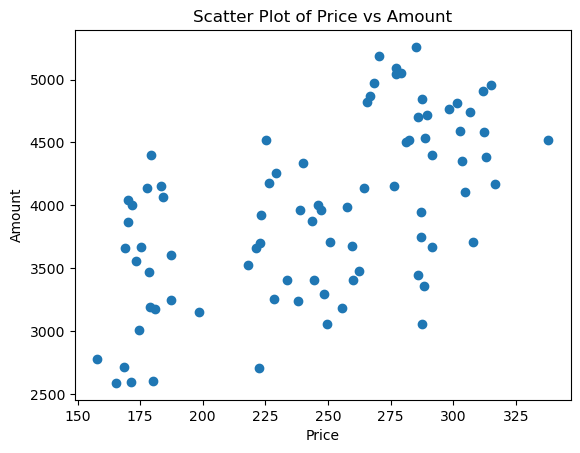

Pearson correlation coefficient: 0.5851939414751609
Correlation Coefficient: 0.5851939414751608
P-value: 6.245760639027057e-09
                             OLS Regression Results                             
Dep. Variable:     hotel_avg_daily_rate   R-squared:                       0.342
Model:                              OLS   Adj. R-squared:                  0.334
Method:                   Least Squares   F-statistic:                     42.18
Date:                  Sun, 10 Dec 2023   Prob (F-statistic):           6.25e-09
Time:                          21:31:41   Log-Likelihood:                -423.16
No. Observations:                    83   AIC:                             850.3
Df Residuals:                        81   BIC:                             855.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t| 

In [50]:
import matplotlib.pyplot as plt

plt.scatter(df['hotel_avg_daily_rate'], df['logan_intl_flights'])
plt.title('Scatter Plot of Price vs Amount')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.show()

correlation = df['hotel_avg_daily_rate'].corr(df['logan_intl_flights'])
print("Pearson correlation coefficient:", correlation)

from scipy import stats

corr_test = stats.pearsonr(df['hotel_avg_daily_rate'], df['logan_intl_flights'])
print("Correlation Coefficient:", corr_test[0])
print("P-value:", corr_test[1])

import statsmodels.api as sm

X = sm.add_constant(df['logan_intl_flights'])  # Add a constant (intercept) to the model
model = sm.OLS(df['hotel_avg_daily_rate'], X).fit()
print(model.summary())


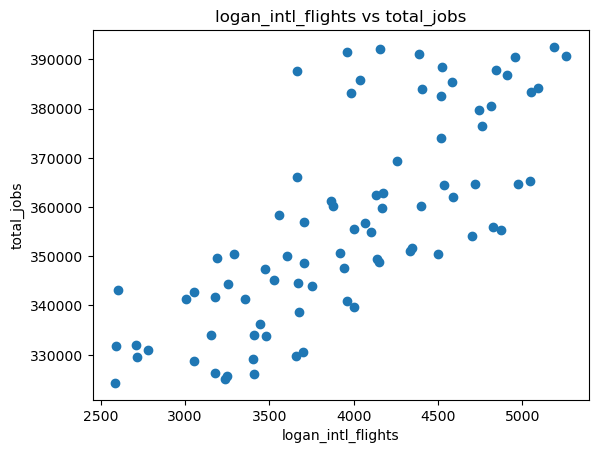

Correlation coefficient: 0.7572903111496254
Correlation Coefficient: 0.7572903111496251
P-value: 1.1898031234036868e-16
                            OLS Regression Results                            
Dep. Variable:             total_jobs   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.19e-16
Time:                        00:06:43   Log-Likelihood:                -905.87
No. Observations:                  83   AIC:                             1816.
Df Residuals:                      81   BIC:                             1821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---

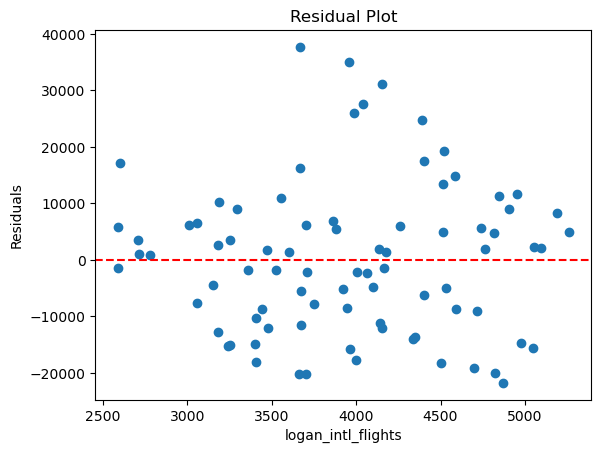

C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:33: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D8125F3350> starts with '_'. It is thus excluded from the legend.
  ax1.legend(handles=[amount_line, amount_scatter], loc='upper left')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:34: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D8126D84D0> starts with '_'. It is thus excluded from the legend.
  ax2.legend(handles=[price_line, price_scatter], loc='upper right')


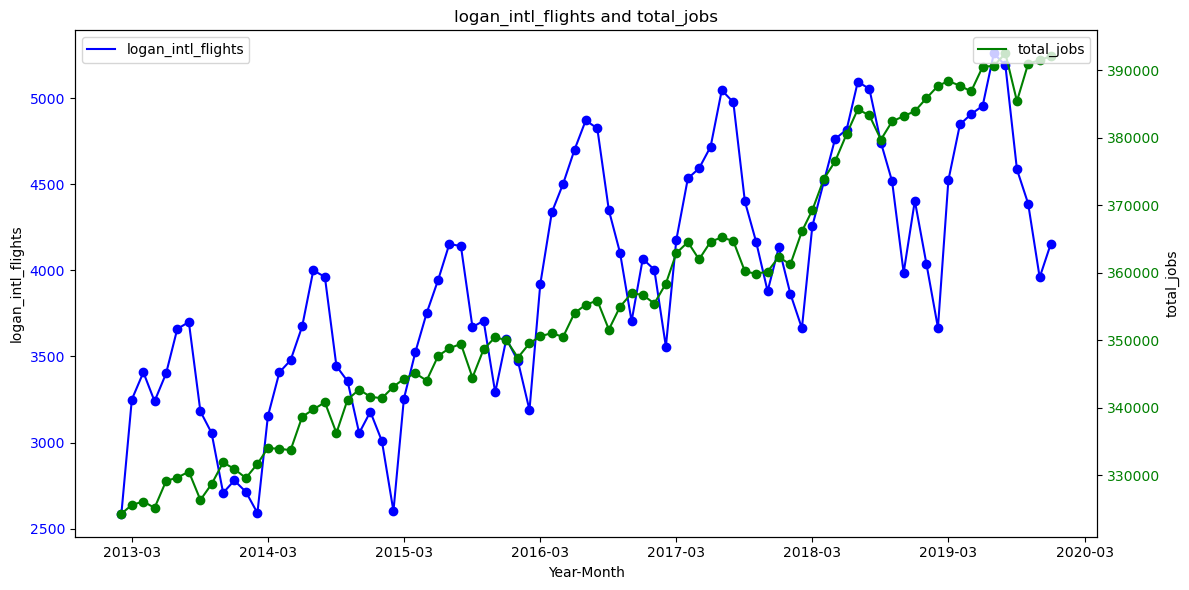

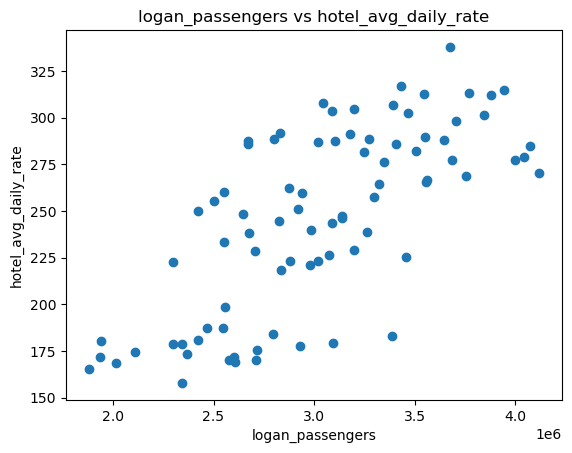

Correlation coefficient: 0.717871244857646
Correlation Coefficient: 0.7178712448576462
P-value: 2.216950011618945e-14
                             OLS Regression Results                             
Dep. Variable:     hotel_avg_daily_rate   R-squared:                       0.515
Model:                              OLS   Adj. R-squared:                  0.509
Method:                   Least Squares   F-statistic:                     86.13
Date:                  Mon, 11 Dec 2023   Prob (F-statistic):           2.22e-14
Time:                          00:06:44   Log-Likelihood:                -410.50
No. Observations:                    83   AIC:                             825.0
Df Residuals:                        81   BIC:                             829.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025

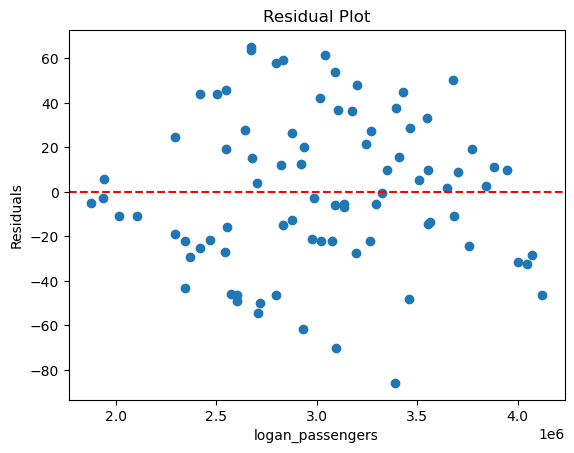

C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:33: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D812615A50> starts with '_'. It is thus excluded from the legend.
  ax1.legend(handles=[amount_line, amount_scatter], loc='upper left')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:34: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D8122BD8D0> starts with '_'. It is thus excluded from the legend.
  ax2.legend(handles=[price_line, price_scatter], loc='upper right')


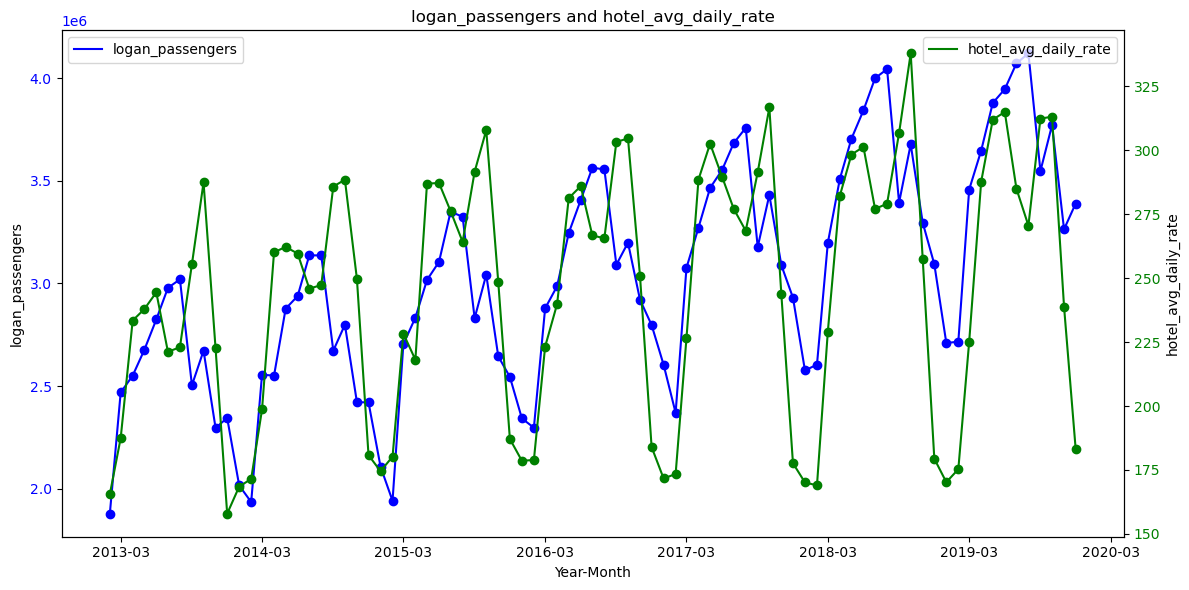

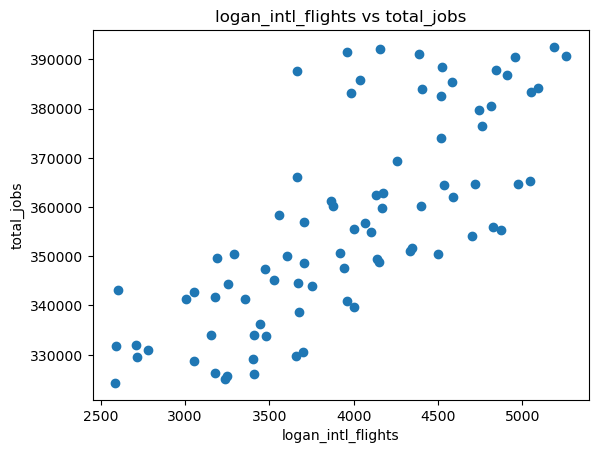

Correlation coefficient: 0.7572903111496254
Correlation Coefficient: 0.7572903111496251
P-value: 1.1898031234036868e-16
                            OLS Regression Results                            
Dep. Variable:             total_jobs   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     108.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.19e-16
Time:                        00:06:45   Log-Likelihood:                -905.87
No. Observations:                  83   AIC:                             1816.
Df Residuals:                      81   BIC:                             1821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---

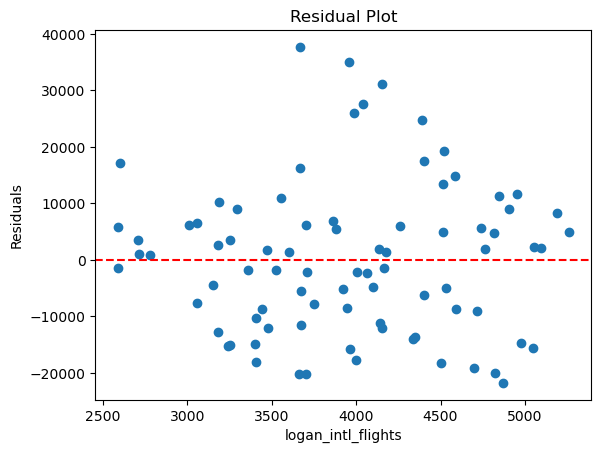

C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:33: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D8122BC750> starts with '_'. It is thus excluded from the legend.
  ax1.legend(handles=[amount_line, amount_scatter], loc='upper left')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:34: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D81203E3D0> starts with '_'. It is thus excluded from the legend.
  ax2.legend(handles=[price_line, price_scatter], loc='upper right')


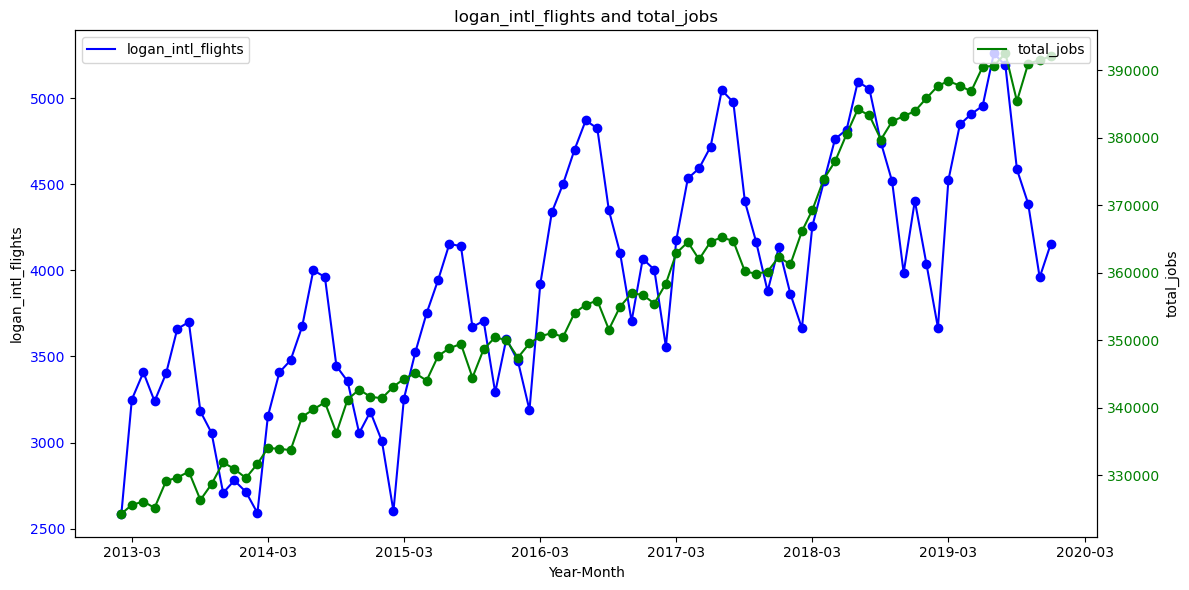

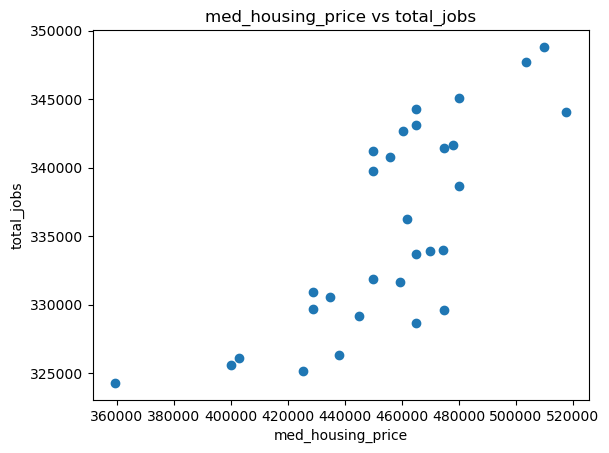

Correlation coefficient: 0.7645071022062058
Correlation Coefficient: 0.7645071022062055
P-value: 8.744627868369869e-07
                            OLS Regression Results                            
Dep. Variable:             total_jobs   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     39.38
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           8.74e-07
Time:                        00:06:46   Log-Likelihood:                -296.09
No. Observations:                  30   AIC:                             596.2
Df Residuals:                      28   BIC:                             599.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----

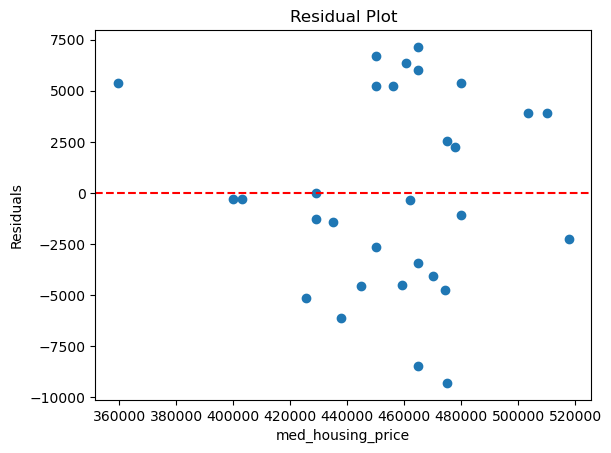

C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:33: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D81260FCD0> starts with '_'. It is thus excluded from the legend.
  ax1.legend(handles=[amount_line, amount_scatter], loc='upper left')
C:\Users\Dell\AppData\Local\Temp\ipykernel_21348\3878808359.py:34: UserWarning: The label '_child1' of <matplotlib.collections.PathCollection object at 0x000001D81201D290> starts with '_'. It is thus excluded from the legend.
  ax2.legend(handles=[price_line, price_scatter], loc='upper right')


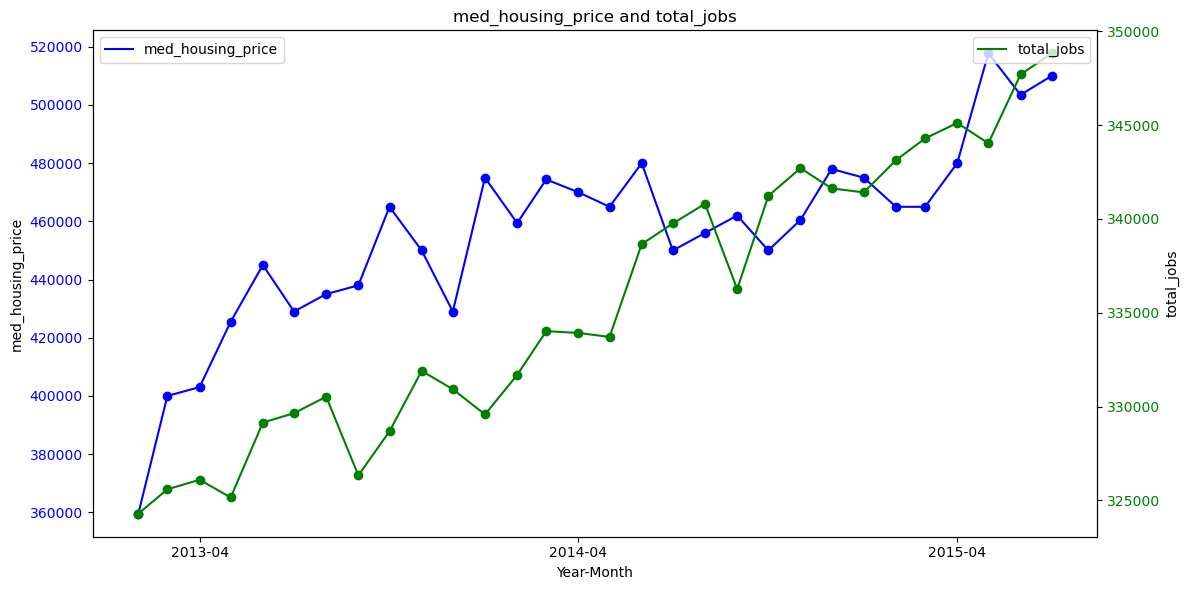

In [140]:
compare(df,'logan_intl_flights','total_jobs')
compare_plt(df,'logan_intl_flights','total_jobs')
compare(df,'logan_passengers','hotel_avg_daily_rate')
compare_plt(df,'logan_passengers','hotel_avg_daily_rate')
compare(df,'logan_intl_flights','total_jobs')
compare_plt(df,'logan_intl_flights','total_jobs')
compare(df[:30],'med_housing_price','total_jobs')
compare_plt(df[:30],'med_housing_price','total_jobs')